<a href="https://colab.research.google.com/github/youavang/inaugural_speech_nlp/blob/main/NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

## Introduction

First, we will be analyzing the sentiment of the overall speech. Then, second, throughout time during the speech. We will be using textblob module and sentiment labels.

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

In [1]:
# Mount to Google Drive to access saved files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Overall Sentiment of Speech

In [2]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('/content/drive/MyDrive/pickle/corpus.pkl')
data

,transcript,full_name
bush,"Thank you, all. Chief Justice Rehnquist, Presi...",George W. Bush
clinton,"My fellow citizens, today we celebrate the mys...",Bill Clinton
obama,"My fellow citizens, I stand here today humbled...",Barack Obama
trump,"Chief Justice Roberts, President Carter, Presi...",Donald Trump


In [3]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
bush,"Thank you, all. Chief Justice Rehnquist, Presi...",George W. Bush,0.184681,0.461185
clinton,"My fellow citizens, today we celebrate the mys...",Bill Clinton,0.153824,0.506206
obama,"My fellow citizens, I stand here today humbled...",Barack Obama,0.082072,0.465790
trump,"Chief Justice Roberts, President Carter, Presi...",Donald Trump,0.157958,0.404878


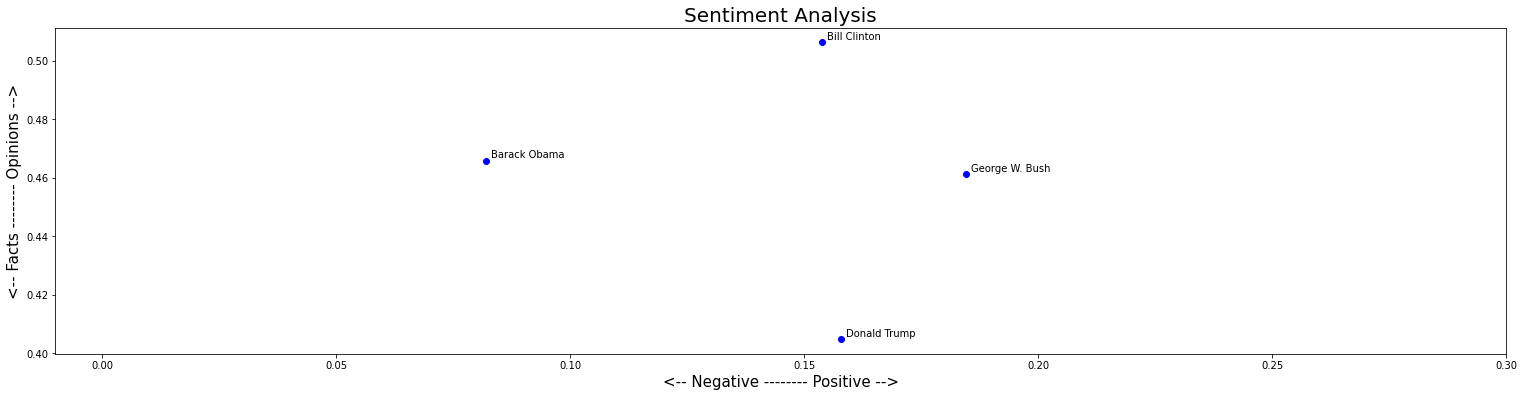

In [14]:
# Let's plot the results
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [24, 8]

for index, president in enumerate(data.index):
    x = data.polarity.loc[president]
    y = data.subjectivity.loc[president]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .30) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

I don't really agree with this plot, because President Trump's speeches contain less factual information than most presidents.

## Sentiment of Speech Over Time

Now we're going to analyze if there's anything interesting about the sentiment over time throughout each speech.

In [5]:
# Split each speech into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["Thank you, all. Chief Justice Rehnquist, President Carter, President Bush, President Clinton, distinguished guests, and my fellow citizens. The peaceful transfer of authority is rare in history, yet common in our country. With a simple oath, we affirm old traditions and make new beginnings. As I begin, I thank President Clinton for his service to our Nation, and I thank Vice President Gore for a contest conducted with spirit and ended with grace. I am honored and humbled to stand here where so many of America's leaders have come before me, and so many will follow. We have a place, all of us, in a long story, a story we continue but whose end we will not see. It is a story of a new world that became a friend and liberator of the old, the story of a slaveholding society that became a servant of freedom, the story of a power that went into the world to protect but not possess, to defend but not to conquer. It is the Americ",
  "an story, a story of flawed and fallible people united acr

In [7]:
# The list has 4 elements, one for each transcript
len(list_pieces)

4

In [8]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [9]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.15206611570247935,
  0.21517857142857144,
  -0.015873015873015865,
  0.2513403263403263,
  0.20370370370370372,
  0.1191919191919192,
  0.16136363636363635,
  0.2701704545454545,
  0.21060606060606063,
  0.2],
 [0.2583333333333333,
  0.13257575757575757,
  0.17830578512396694,
  0.21017316017316015,
  0.21510416666666668,
  0.2274691358024691,
  0.07670454545454548,
  0.2670454545454546,
  0.049025974025974035,
  0.07812499999999999],
 [-0.06619696969696971,
  0.1144927536231884,
  0.09808812981889906,
  0.016267942583732046,
  0.05874999999999999,
  0.12205387205387205,
  0.008712121212121213,
  0.17329545454545453,
  0.12100168350168349,
  0.1142857142857143],
 [0.5017857142857143,
  0.033392857142857134,
  0.26,
  0.11785714285714283,
  0.007219251336898393,
  0.14154040404040405,
  0.25104843073593075,
  0.13823529411764707,
  0.0986521054702873,
  0.28484848484848485]]

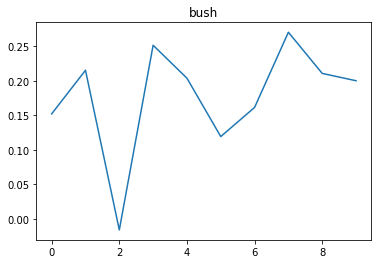

In [10]:
# Show the plot for one president
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

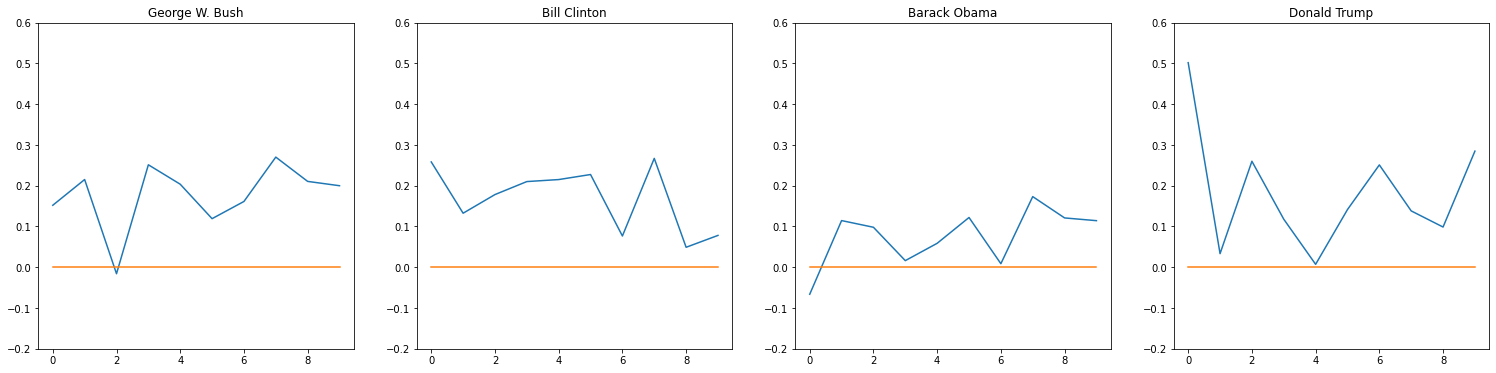

In [13]:
# Show the plot for all presidents
plt.rcParams['figure.figsize'] = [26, 6]

for index, presidentn in enumerate(data.index):    
    plt.subplot(1, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.6)
    
plt.show()